In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from config import constants
from sleep_wake_filters import (
    episode_length,
    sleep_wake_filter_1,
    sleep_wake_filter_2,
    sleep_wake_filter_3
    )

In [17]:
def plot_sleep(df, plot_pos, name):
    plt.subplot(4, 1, plot_pos)
    plt.plot(df['sleep'])

    df['episode_len'], df['episode_ind'] = episode_length(df['sleep'])
    length_annot = df.reset_index().groupby('episode_ind').agg(x=('index', 'mean'), episode_len=('episode_len', 'mean'))
    for i, (x, text) in enumerate(zip(length_annot['x'], length_annot['episode_len'].astype(int))):
        y_offset = ((i % 4) - 1.5) / 6
        plt.annotate(text, (x, 0.5 + y_offset), ha='center', va='center', fontsize=12)

    plt.yticks([constants['WAKE'], constants['SLEEP']], ['Wake', 'Sleep'], fontsize=12)
    plt.ylabel(name, fontsize=12)

In [18]:
# Generate a test sample

sample_len = 1000
switch_prob = (np.random.random(size=sample_len) >= 0.97).astype(int)
switch_prob = -(switch_prob - 0.5) * 2
sleep = (np.cumprod(switch_prob) + 1) / 2

df = pd.DataFrame({
    'sleep': sleep
})

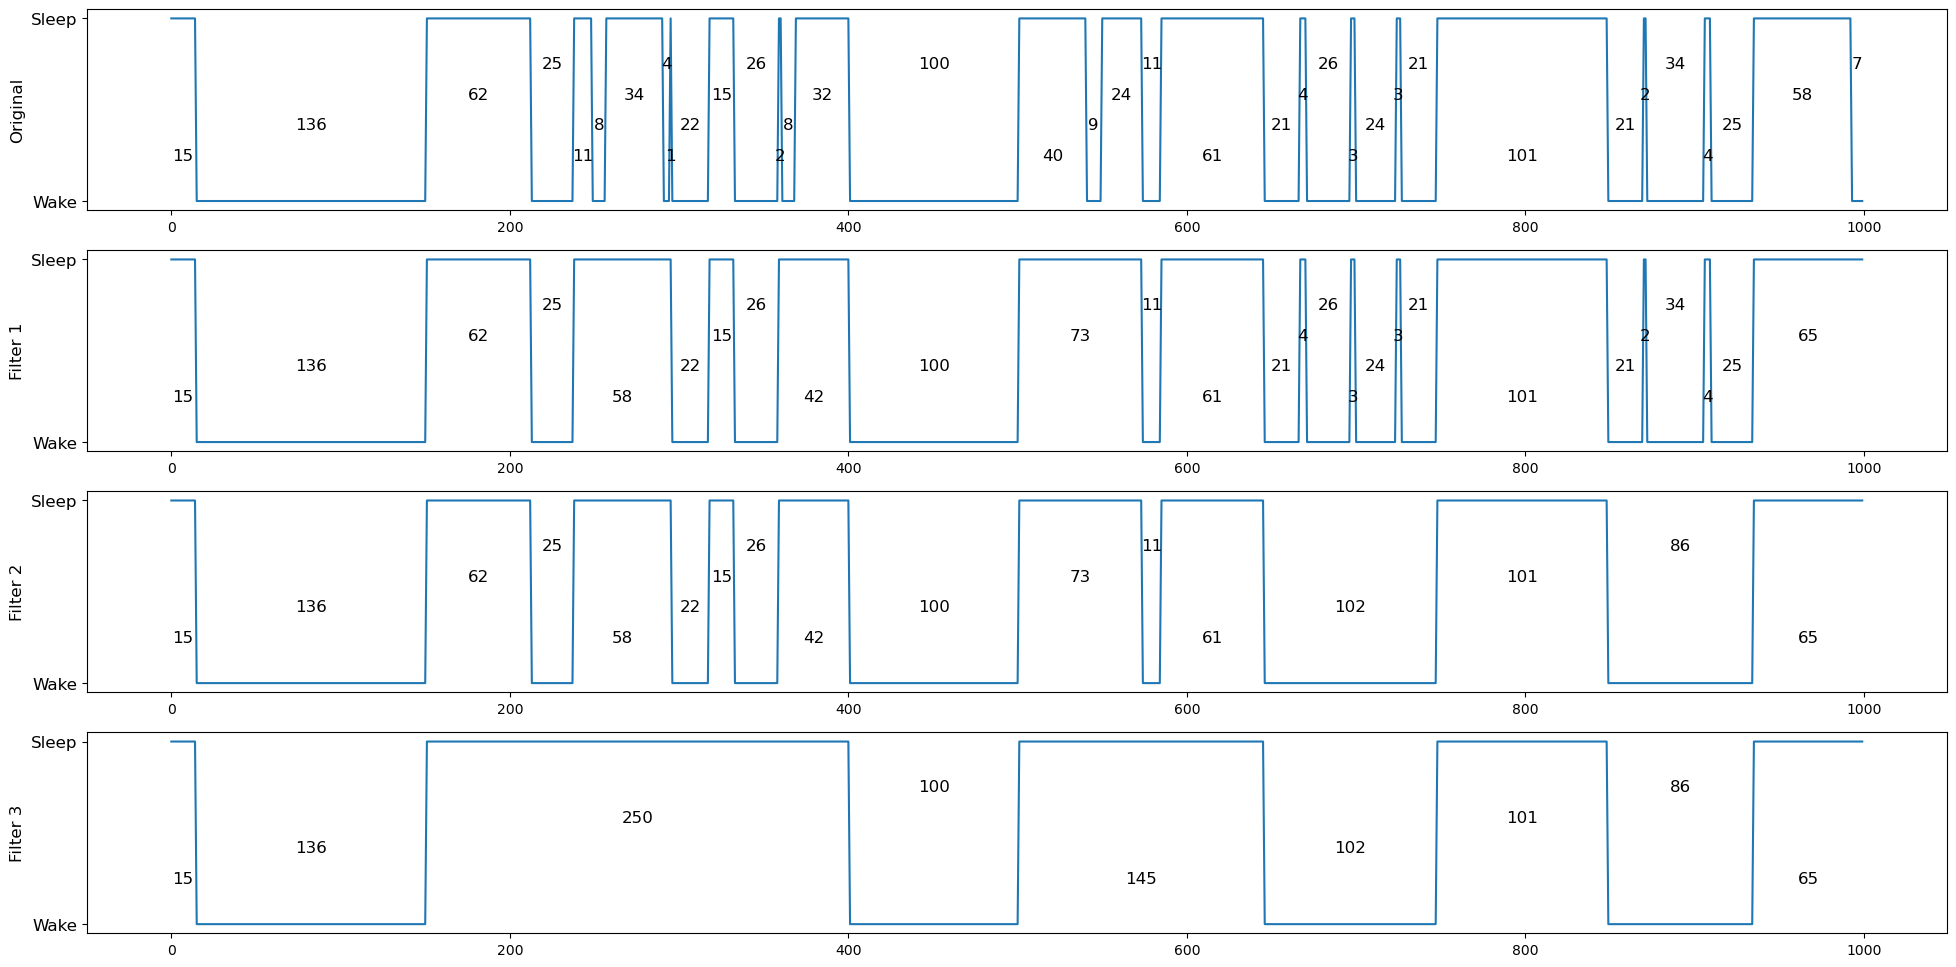

In [19]:
plt.figure(figsize=(24, 12))

df['episode_len'], df['episode_ind'] = episode_length(df['sleep'])
plot_sleep(df, 1, name='Original')

# Filter 1
df['sleep'] = sleep_wake_filter_1(df['sleep'])
plot_sleep(df, 2, name='Filter 1')

# Filter 2
df['sleep'] = sleep_wake_filter_2(df['sleep'])
plot_sleep(df, 3, name='Filter 2')

# Filter 3
df['sleep'] = sleep_wake_filter_3(df['sleep'])
plot_sleep(df, 4, name='Filter 3')

plt.show()


In [20]:
length_annot['episode_len'][i]

NameError: name 'length_annot' is not defined